In [4]:
import numpy as np

import torch
import torch.nn as nn
import torch.nn.functional as fn

from torch.nn import MSELoss
from torch.optim import Adam
from torch.utils import data
from torch.autograd import Variable
from torch.utils.data import DataLoader

from plot import show_images
from dataset import MNIBITE
from transform import ROICrop

In [8]:
loader = DataLoader(
    MNIBITE('mnibite', 13, ROICrop()),
    batch_size=1, num_workers=4)

In [5]:
class SimpleNet(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv = nn.Conv2d(1, 3, 3, padding=1)
        self.final = nn.Conv2d(3, 1, 1)

    def forward(self, x):
        x = self.conv(x)
        x = self.final(x)
        return x

In [ ]:
model = SimpleNet()
criterion = MSELoss(size_average=False)
optimizer = Adam(model.parameters(), lr=.001)

for epoch in range(1, 30):
    epoch_loss = 0
    
    for step, (inputs, target) in enumerate(loader):
        if not np.any(target.numpy()):
            continue
            
        inputs = Variable(inputs).unsqueeze(1)
        target = Variable(target).unsqueeze(1)
        
        optimizer.zero_grad()
        loss = criterion(model(inputs), target)
        loss.backward()
        optimizer.step()
        
        epoch_loss += loss.data[0]
        
    print('epoch: {}, loss: {}'.format(epoch, epoch_loss))

Process Process-8:
Process Process-5:
Traceback (most recent call last):
Traceback (most recent call last):
  File "/usr/local/Cellar/python3/3.6.0/Frameworks/Python.framework/Versions/3.6/lib/python3.6/multiprocessing/process.py", line 249, in _bootstrap
    self.run()
  File "/usr/local/Cellar/python3/3.6.0/Frameworks/Python.framework/Versions/3.6/lib/python3.6/multiprocessing/process.py", line 249, in _bootstrap
    self.run()
  File "/usr/local/Cellar/python3/3.6.0/Frameworks/Python.framework/Versions/3.6/lib/python3.6/multiprocessing/process.py", line 93, in run
    self._target(*self._args, **self._kwargs)
  File "/usr/local/Cellar/python3/3.6.0/Frameworks/Python.framework/Versions/3.6/lib/python3.6/multiprocessing/process.py", line 93, in run
    self._target(*self._args, **self._kwargs)
  File "/Users/bodokaiser/.virtualenvs/mrtous-pytorch/lib/python3.6/site-packages/torch/utils/data/dataloader.py", line 36, in _worker_loop
    data_queue.put((idx, samples))
  File "/Users/bodo

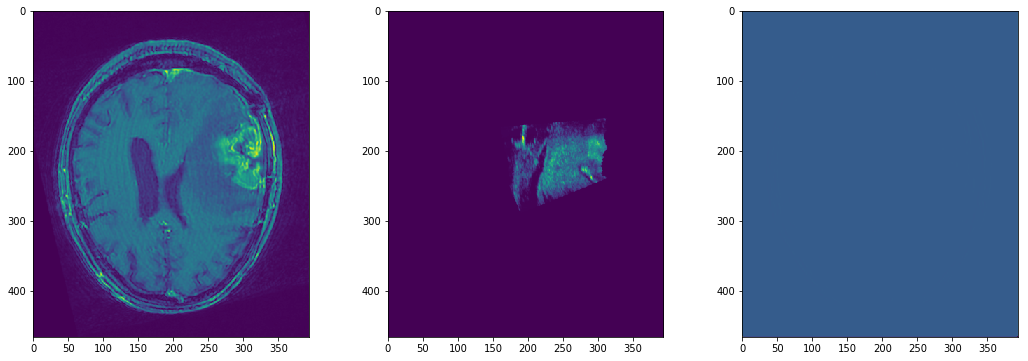

In [61]:
mr, us = iter(loader).next()

mr = Variable(mr).unsqueeze(1)
us = Variable(us).unsqueeze(1)

plot.show_images(np.concatenate([
    mr.data[1].numpy(),
    us.data[1].numpy(),
    model(mr).data[1].numpy(),
]), 1, 3)

In [68]:
class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(1, 12, 7, padding=4)
        self.conv2 = nn.Conv2d(12, 24, 3, padding=0)
        self.final = nn.Conv2d(24, 1, 1)

    def forward(self, x):
        x = self.conv1(x)
        x = self.conv2(x)
        x = self.final(x)
        return x
    
model = Net()

criterion = MSELoss(size_average=False)
optimizer = Adam(model.parameters(), lr=.001)

for epoch in range(1, 30):
    epoch_loss = 0
    
    for step, (inputs, target) in enumerate(loader):
        inputs = Variable(inputs).unsqueeze(1)
        target = Variable(target).unsqueeze(1)
        
        optimizer.zero_grad()
        loss = criterion(model(inputs), target)
        loss.backward()
        optimizer.step()
        
        epoch_loss += loss.data[0]
        
    print('epoch: {}, loss: {}'.format(epoch, epoch_loss))

epoch: 1, loss: 106671.95376859605
epoch: 2, loss: 9.099427294917405
epoch: 3, loss: 3.2710313950665295
epoch: 4, loss: 3.2292501060292125
epoch: 5, loss: 3.1566382674500346
epoch: 6, loss: 3.0705582392401993
epoch: 7, loss: 2.9513881583698094
epoch: 8, loss: 2.9004780193790793
epoch: 9, loss: 2.8336122604086995
epoch: 10, loss: 2.7623550198040903
epoch: 11, loss: 2.6705499021336436
epoch: 12, loss: 2.5814657867886126
epoch: 13, loss: 2.587936289841309
epoch: 14, loss: 2.4895071093924344
epoch: 15, loss: 2.445643172133714
epoch: 16, loss: 2.384971839375794
epoch: 17, loss: 2.3663126309402287
epoch: 18, loss: 2.3646939877653494
epoch: 19, loss: 2.3404585502576083
epoch: 20, loss: 2.2703963752137497
epoch: 21, loss: 2.3402150091715157
epoch: 22, loss: 2.2840798161923885
epoch: 23, loss: 2.2826423790538684
epoch: 24, loss: 2.277804675512016
epoch: 25, loss: 2.351596417487599
epoch: 26, loss: 2.2529237689450383
epoch: 27, loss: 2.268653975101188
epoch: 28, loss: 2.256176814844366
epoch: 29

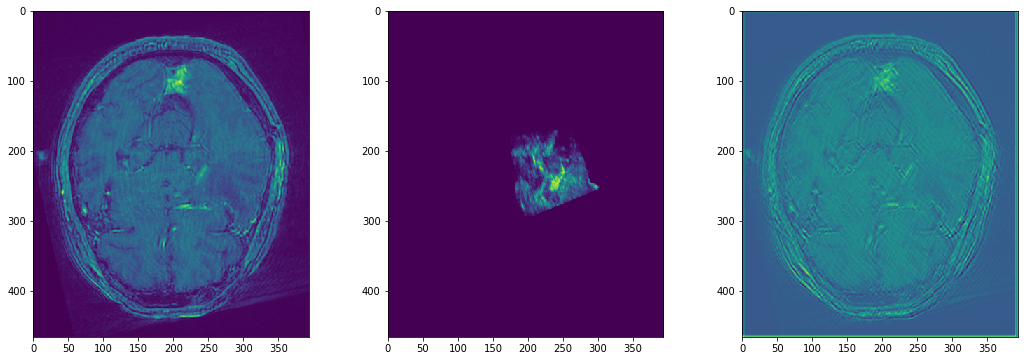

In [76]:
mr, us = iter(loader).next()

mr = Variable(mr).unsqueeze(1)
us = Variable(us).unsqueeze(1)

plot.show_images(np.concatenate([
    mr.data[1].numpy(),
    us.data[1].numpy(),
    model(mr).data[1].numpy(),
]), 1, 3)

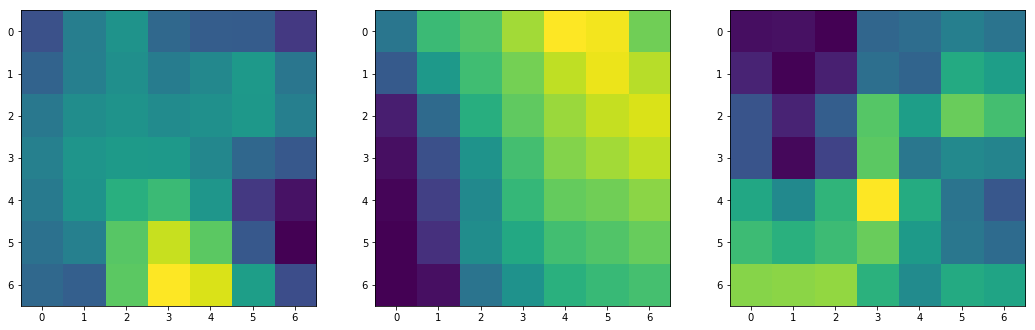

In [79]:
plot.show_images(np.concatenate([
    input_patches.data[2].numpy(),
    target_patches.data[2].numpy(),
    model(input_patches).data[2].numpy(),
]), 1, 3)